## Clustering COVID-19 Epidemiological data

In [30]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [31]:
# load the dataset
df_mar = pd.read_csv('D2_mar.csv', na_filter=False)
df_apr = pd.read_csv('D2_apr.csv', na_filter=False)

In [32]:
# info and the first 10 objects March
print(df_mar.info())
df_mar.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   residual_transmission               102 non-null    float64
 1   regulatable_transmission            102 non-null    float64
 2   recovery_rate                       102 non-null    float64
 3   detection_rate                      102 non-null    float64
 4   death_rate                          102 non-null    float64
 5   response_slope                      102 non-null    float64
 6   initial_relative_latent_infections  102 non-null    float64
 7   response_weights                    102 non-null    float64
 8   Country                             102 non-null    object 
dtypes: float64(8), object(1)
memory usage: 7.3+ KB
None


,residual_transmission,regulatable_transmission,recovery_rate,detection_rate,death_rate,response_slope,initial_relative_latent_infections,response_weights,Country
0,0.082074,0.165898,0.129952,0.182487,0.171807,0.246873,0.390325,0.022931,ARM
1,0.562484,0.455037,0.117553,0.131436,1.000000,0.321751,0.363993,0.086713,HND
2,0.155940,0.114082,0.120652,0.326850,0.045329,0.315136,0.328607,0.050099,HRV
3,0.223770,0.057646,0.188609,0.260266,0.175669,0.364244,0.148891,0.041622,HUN
4,0.125226,0.175619,0.064618,0.226420,0.359110,0.356035,0.198390,0.043566,IDN
5,0.104898,0.109630,0.145450,0.150750,0.156842,0.282763,0.248260,0.039343,IND
6,0.206818,0.114273,0.009538,0.238616,0.081535,0.301471,0.195284,0.047125,IRL
7,0.278832,0.163941,0.562225,0.305088,0.224908,0.406639,0.646247,0.076565,IRN
8,0.059753,0.060035,0.481505,0.125712,0.320008,0.321550,0.206002,0.046666,IRQ
9,0.095059,0.175975,0.158565,0.198385,0.081052,0.322671,0.177813,0.016532,ISL


In [33]:
# info and the first 10 objects April
print(df_apr.info())
df_apr.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   residual_transmission               118 non-null    float64
 1   regulatable_transmission            118 non-null    float64
 2   recovery_rate                       118 non-null    float64
 3   detection_rate                      118 non-null    float64
 4   death_rate                          118 non-null    float64
 5   response_slope                      118 non-null    float64
 6   initial_relative_latent_infections  118 non-null    float64
 7   response_weights                    118 non-null    float64
 8   Country                             118 non-null    object 
dtypes: float64(8), object(1)
memory usage: 8.4+ KB
None


,residual_transmission,regulatable_transmission,recovery_rate,detection_rate,death_rate,response_slope,initial_relative_latent_infections,response_weights,Country
0,0.131963,0.255172,0.140451,0.414993,0.111962,0.524878,0.242902,0.111030,ARM
1,0.116540,0.161582,0.006474,0.313977,0.290702,0.626924,0.202345,0.082216,HND
2,0.309550,0.170677,0.181263,0.446829,0.052805,0.460828,0.287432,0.115284,HRV
3,0.308746,0.143622,0.112023,0.337022,0.309755,0.663060,0.168879,0.129442,HUN
4,0.402650,0.168968,0.095417,0.423608,0.406837,0.681194,0.239864,0.181562,IDN
5,0.355575,0.189707,0.214195,0.220276,0.417725,0.551664,0.363003,0.157203,IND
6,0.265084,0.211294,0.014636,0.193841,0.189991,0.621625,0.508331,0.102240,IRL
7,0.358552,0.146323,0.717806,0.587117,0.317014,0.553679,0.423462,0.086123,IRN
8,0.132339,0.117653,0.642492,0.209792,0.309755,0.398068,0.200169,0.091323,IRQ
9,0.340873,0.268372,0.418398,0.587414,0.113777,0.509864,0.091395,0.054590,ISL


Detection and removal of anomalous records was required on datasets before building the clustering model. Anomalies (outliers) were detected by plotting the distribution of the five selected variables using distplot and then removed accordingly. After dropping the outliers, the number of rows in D2_mar .csv changed from 102 to 88, in D2_apr .csv changed from 118 to 106.

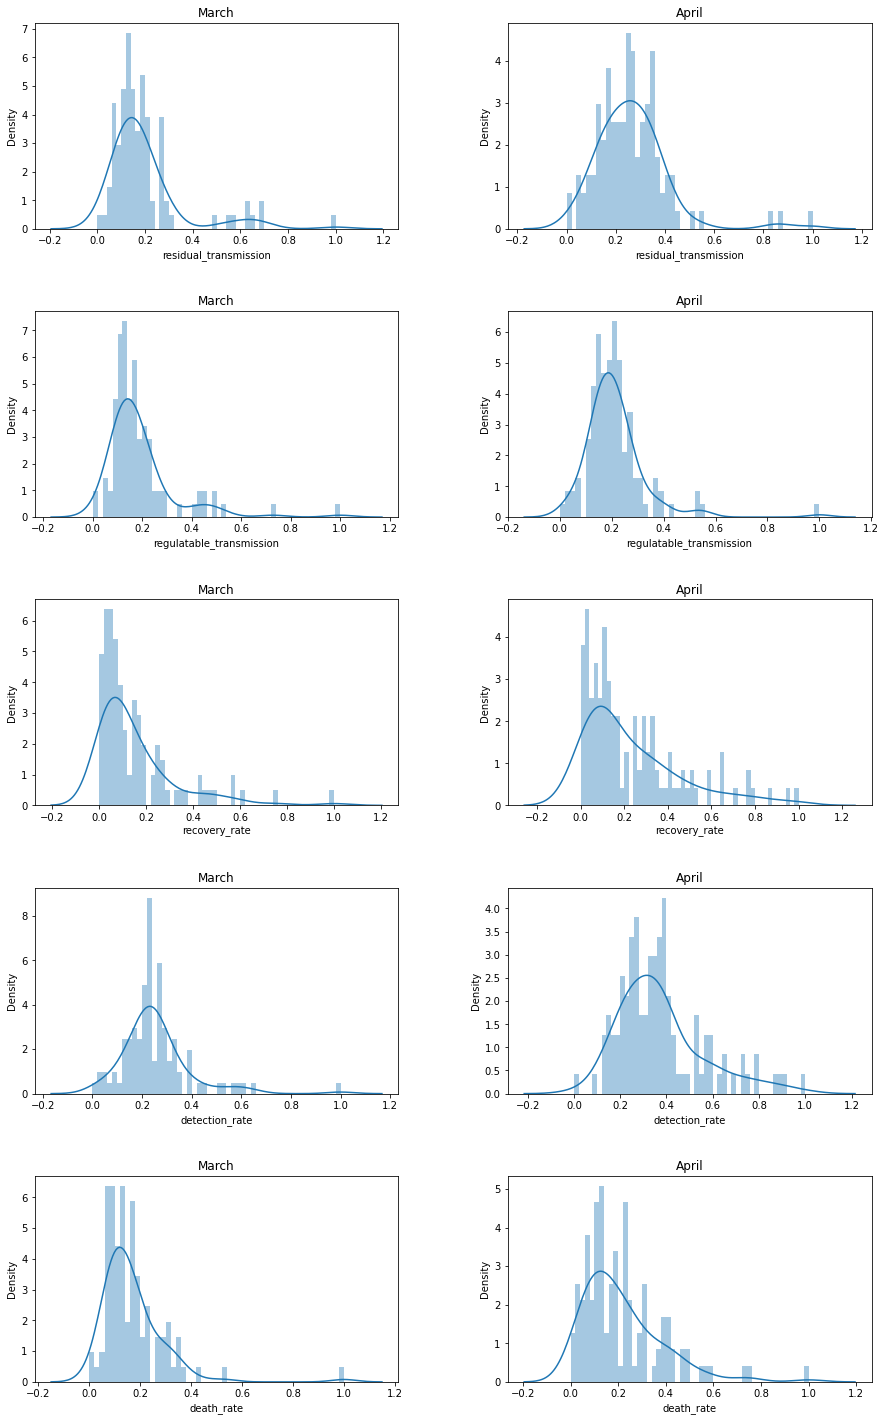

In [34]:
# Detection of anomalies (outliers) by visualisation: 
f, axes = plt.subplots(5,2, figsize=(15,25))
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.4)

bin_number=50

# Distribution of residual_transmission
sns.distplot(df_mar['residual_transmission'].dropna(), bins=bin_number, ax=axes[0,0]).set(title='March')
sns.distplot(df_apr['residual_transmission'].dropna(), bins=bin_number, ax=axes[0,1]).set(title='April')

# Distribution of regulatable_transmission
sns.distplot(df_mar['regulatable_transmission'].dropna(), bins=bin_number, ax=axes[1,0]).set(title='March')
sns.distplot(df_apr['regulatable_transmission'].dropna(), bins=bin_number, ax=axes[1,1]).set(title='April')

# Distribution of recovery_rate
sns.distplot(df_mar['recovery_rate'].dropna(), bins=bin_number, ax=axes[2,0]).set(title='March')
sns.distplot(df_apr['recovery_rate'].dropna(), bins=bin_number, ax=axes[2,1]).set(title='April')

# Distribution of detection_rate
sns.distplot(df_mar['detection_rate'].dropna(), bins=bin_number, ax=axes[3,0]).set(title='March')
sns.distplot(df_apr['detection_rate'].dropna(), bins=bin_number, ax=axes[3,1]).set(title='April')

# Distribution of death_rate
sns.distplot(df_mar['death_rate'].dropna(), bins=bin_number, ax=axes[4,0]).set(title='March')
sns.distplot(df_apr['death_rate'].dropna(), bins=bin_number, ax=axes[4,1]).set(title='April')


plt.show()

In [35]:
# Remove outliers
# For March (D2_mar.csv)
df_march = df_mar[df_mar['residual_transmission'] <= 0.4]
df_march = df_march[df_march['regulatable_transmission']  <= 0.4]
df_march = df_march[df_march['recovery_rate'] <= 0.6]
df_march = df_march[df_march['detection_rate'] <= 0.6]
df_march = df_march[df_march['death_rate'] <= 0.5]
# For April (D2_apr.csv)
df_april = df_apr[df_apr['residual_transmission'] <= 0.8]
df_april = df_april[df_april['regulatable_transmission'] <= 0.5]
df_april = df_april[df_april['recovery_rate'] < 0.8]
df_april = df_april[df_april['detection_rate'] < 0.8]
df_april = df_april[df_april['death_rate'] < 0.7]

print("Row # in D2_mar .csv: before dropping outliers", len(df_mar), ", after dropping outliers", len(df_march))
print("Row # in D2_apr .csv: before dropping outliers", len(df_apr), ", after dropping outliers", len(df_april))

Row # in D2_mar .csv: before dropping outliers 102 , after dropping outliers 88
Row # in D2_apr .csv: before dropping outliers 118 , after dropping outliers 106


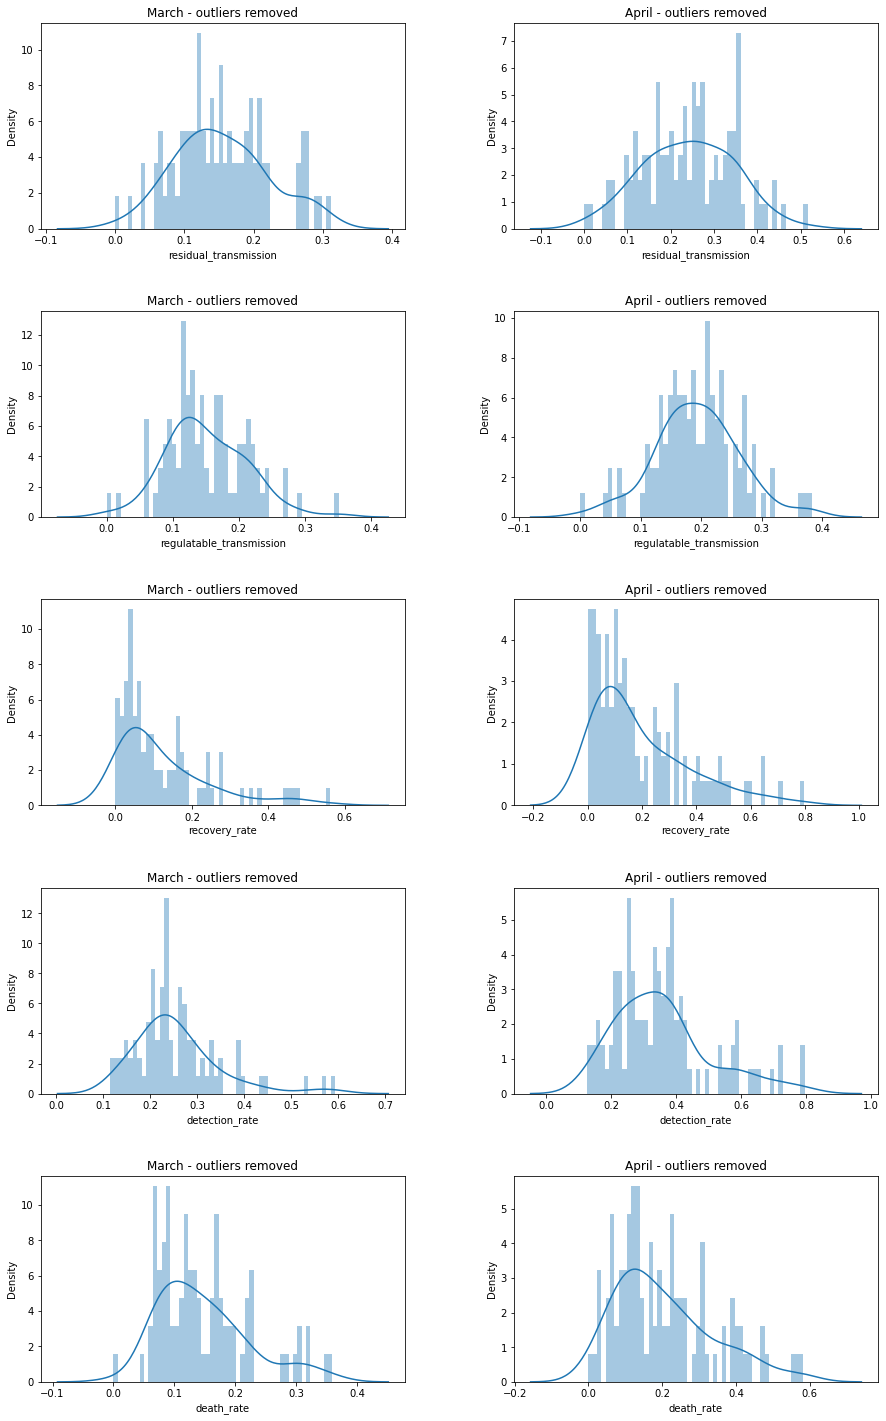

In [36]:
# Check after dropping outliers by isualisations: 
f, axes = plt.subplots(5,2, figsize=(15,25))
plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.4)

bin_number=50
# Distribution of residual_transmission
sns.distplot(df_march['residual_transmission'].dropna(), bins=bin_number, ax=axes[0,0]).set(title='March - outliers removed')
sns.distplot(df_april['residual_transmission'].dropna(), bins=bin_number, ax=axes[0,1]).set(title='April - outliers removed')
# Distribution of regulatable_transmission
sns.distplot(df_march['regulatable_transmission'].dropna(), bins=bin_number, ax=axes[1,0]).set(title='March - outliers removed')
sns.distplot(df_april['regulatable_transmission'].dropna(), bins=bin_number, ax=axes[1,1]).set(title='April - outliers removed')
# Distribution of recovery_rate
sns.distplot(df_march['recovery_rate'].dropna(), bins=bin_number, ax=axes[2,0]).set(title='March - outliers removed')
sns.distplot(df_april['recovery_rate'].dropna(), bins=bin_number, ax=axes[2,1]).set(title='April - outliers removed')
# Distribution of detection_rate
sns.distplot(df_march['detection_rate'].dropna(), bins=bin_number, ax=axes[3,0]).set(title='March - outliers removed')
sns.distplot(df_april['detection_rate'].dropna(), bins=bin_number, ax=axes[3,1]).set(title='April - outliers removed')
# Distribution of death_rate
sns.distplot(df_march['death_rate'].dropna(), bins=bin_number, ax=axes[4,0]).set(title='March - outliers removed')
sns.distplot(df_april['death_rate'].dropna(), bins=bin_number, ax=axes[4,1]).set(title='April - outliers removed')

plt.show()

#### K-Means
The clustering algorithm has been used is K-means, since all the attributes used in the analysis are numeric. Furthermore, since it was dropped potential outliers, the means of each variable was not affected.

Attributes used in this analysis are residual_transmission, regulatable_transmission, recovery_rate, detection_rate, and death_rate as per the Agency’s interest. Moreover, the ID-like variable Country has been excluded because its values are unique for each record.

In [33]:
# Select attributes for March
df_mar2 = df_march[['residual_transmission', 'regulatable_transmission', 'recovery_rate', 
                    'detection_rate', 'death_rate']]
print(df_mar2.info())
df_mar2.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 101
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   residual_transmission     88 non-null     float64
 1   regulatable_transmission  88 non-null     float64
 2   recovery_rate             88 non-null     float64
 3   detection_rate            88 non-null     float64
 4   death_rate                88 non-null     float64
dtypes: float64(5)
memory usage: 4.1 KB
None


,residual_transmission,regulatable_transmission,recovery_rate,detection_rate,death_rate
0,0.082074,0.165898,0.129952,0.182487,0.171807
2,0.155940,0.114082,0.120652,0.326850,0.045329
3,0.223770,0.057646,0.188609,0.260266,0.175669
4,0.125226,0.175619,0.064618,0.226420,0.359110
5,0.104898,0.109630,0.145450,0.150750,0.156842
6,0.206818,0.114273,0.009538,0.238616,0.081535
7,0.278832,0.163941,0.562225,0.305088,0.224908
8,0.059753,0.060035,0.481505,0.125712,0.320008
9,0.095059,0.175975,0.158565,0.198385,0.081052
10,0.172744,0.091613,0.095616,0.114672,0.167462


In [34]:
# Select attributes for April
df_apr2 = df_april[['residual_transmission', 'regulatable_transmission', 'recovery_rate', 
                    'detection_rate', 'death_rate']]
print(df_apr2.info())
df_apr2.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 117
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   residual_transmission     106 non-null    float64
 1   regulatable_transmission  106 non-null    float64
 2   recovery_rate             106 non-null    float64
 3   detection_rate            106 non-null    float64
 4   death_rate                106 non-null    float64
dtypes: float64(5)
memory usage: 5.0 KB
None


,residual_transmission,regulatable_transmission,recovery_rate,detection_rate,death_rate
0,0.131963,0.255172,0.140451,0.414993,0.111962
1,0.116540,0.161582,0.006474,0.313977,0.290702
2,0.309550,0.170677,0.181263,0.446829,0.052805
3,0.308746,0.143622,0.112023,0.337022,0.309755
4,0.402650,0.168968,0.095417,0.423608,0.406837
5,0.355575,0.189707,0.214195,0.220276,0.417725
6,0.265084,0.211294,0.014636,0.193841,0.189991
7,0.358552,0.146323,0.717806,0.587117,0.317014
8,0.132339,0.117653,0.642492,0.209792,0.309755
9,0.340873,0.268372,0.418398,0.587414,0.113777


In [35]:
# convert to matrix
X_MAR = df_mar2.to_numpy()
X_APR = df_apr2.to_numpy()
# Do not need scaling as the values reported are standardised values of the originals 
# scaler = StandardScaler()
# X_MAR = scaler.fit_transform(X_MAR)

#### Determine optimal K using elbow method

The optimal number of clusters K identified for D2_mar.csv and D2_apr.csv are 3 and 2 respectively.
Given that the business question has not specified the K values, here the optimal number of clusters were determined using elbow curve method combined with average silhouette method.
Firstly, the elbow method was performed by running k-means clustering with K values ranging from 1 to 14 on both datasets. The curves of the total within-cluster sum of square were then plotted according to the K values. As shown in Figure b-3, the elbows for both datasets locate between 2 and 6.

In [ ]:
#Determine optimal K using elbow method for March 
# random state
rs = 42

# list to save the clusters and cost
clusters = []
inertia_vals = []

for k in range(1,15,1):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs)
    model.fit(X_MAR)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

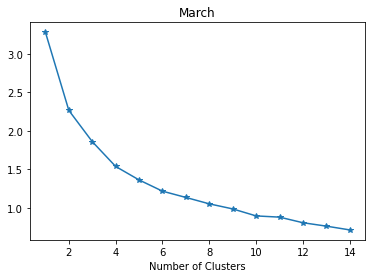

In [37]:
# plot the inertia vs K values
plt.plot(range(1,15,1), inertia_vals, marker='*')
plt.title("March")
plt.xlabel("Number of Clusters")
plt.show()

In [38]:
# K=3
model = KMeans(n_clusters=3, random_state=rs)
model.fit(X_MAR)

# sum of intra-cluster distances
print("Sum of intra-cluster distance:", model.inertia_)

print("Centroid locations:")
for centroid in model.cluster_centers_:
    print(centroid)

Sum of intra-cluster distance: 1.8615562720584269
Centroid locations:
[0.18561442 0.1733324  0.10924107 0.48169777 0.13774631]
[0.14766559 0.15335559 0.06672565 0.22917035 0.13320344]
[0.16427786 0.13334146 0.32039896 0.25608696 0.19629972]


In [39]:
# Determine optimal K by silhouette analysis for March (Mean Silhouette Coefficient)
print(clusters[1])
print("Silhouette score for k=2", silhouette_score(X_MAR, clusters[1].predict(X_MAR)))

print(clusters[2])
print("Silhouette score for k=3", silhouette_score(X_MAR, clusters[2].predict(X_MAR)))

print(clusters[3])
print("Silhouette score for k=4", silhouette_score(X_MAR, clusters[3].predict(X_MAR)))

print(clusters[4])
print("Silhouette score for k=5", silhouette_score(X_MAR, clusters[4].predict(X_MAR)))

print(clusters[5])
print("Silhouette score for k=6", silhouette_score(X_MAR, clusters[5].predict(X_MAR)))

KMeans(n_clusters=2, random_state=42)
Silhouette score for k=2 0.3477745521398861
KMeans(n_clusters=3, random_state=42)
Silhouette score for k=3 0.34859488441553727
KMeans(n_clusters=4, random_state=42)
Silhouette score for k=4 0.24459297951639322
KMeans(n_clusters=5, random_state=42)
Silhouette score for k=5 0.21997672720553132
KMeans(n_clusters=6, random_state=42)
Silhouette score for k=6 0.21879222496955625


In [40]:
# Determine optimal K using elbow method for April

# random state
rs = 42

# list to save the clusters and cost
clusters = []
inertia_vals = []

for k in range(1,15,1):
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=rs)
    model.fit(X_APR)
    
    # append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

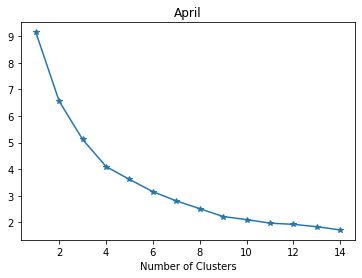

In [41]:
# plot the inertia vs K values
plt.plot(range(1,15,1), inertia_vals, marker='*')
plt.title("April")
plt.xlabel("Number of Clusters")
plt.show()

In [42]:
# Determine optimal K by silhouette analysis for April (Mean Silhouette Coefficient)
print(clusters[1])
print("Silhouette score for k=2", silhouette_score(X_APR, clusters[1].predict(X_APR)))

print(clusters[2])
print("Silhouette score for k=3", silhouette_score(X_APR, clusters[2].predict(X_APR)))

print(clusters[3])
print("Silhouette score for k=4", silhouette_score(X_APR, clusters[3].predict(X_APR)))

print(clusters[4])
print("Silhouette score for k=5", silhouette_score(X_APR, clusters[4].predict(X_APR)))

print(clusters[5])
print("Silhouette score for k=6", silhouette_score(X_APR, clusters[5].predict(X_APR)))

KMeans(n_clusters=2, random_state=42)
Silhouette score for k=2 0.3265405791858515
KMeans(n_clusters=3, random_state=42)
Silhouette score for k=3 0.2937216754136327
KMeans(n_clusters=4, random_state=42)
Silhouette score for k=4 0.27424070974310893
KMeans(n_clusters=5, random_state=42)
Silhouette score for k=5 0.2155920034207267
KMeans(n_clusters=6, random_state=42)
Silhouette score for k=6 0.2413999471698777


In [43]:
# April: highest Silhouette score : k=2 0.3283815694311127

### Q3 March K=3

In [44]:
# March model K=3
model = KMeans(n_clusters=3, random_state=rs).fit(X_MAR)

# assign cluster ID to each record in X
y = model.predict(X_MAR)
df_mar2['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership - March")
print(df_mar2['Cluster_ID'].value_counts())

Cluster membership - March
1    62
2    19
0     7
Name: Cluster_ID, dtype: int64


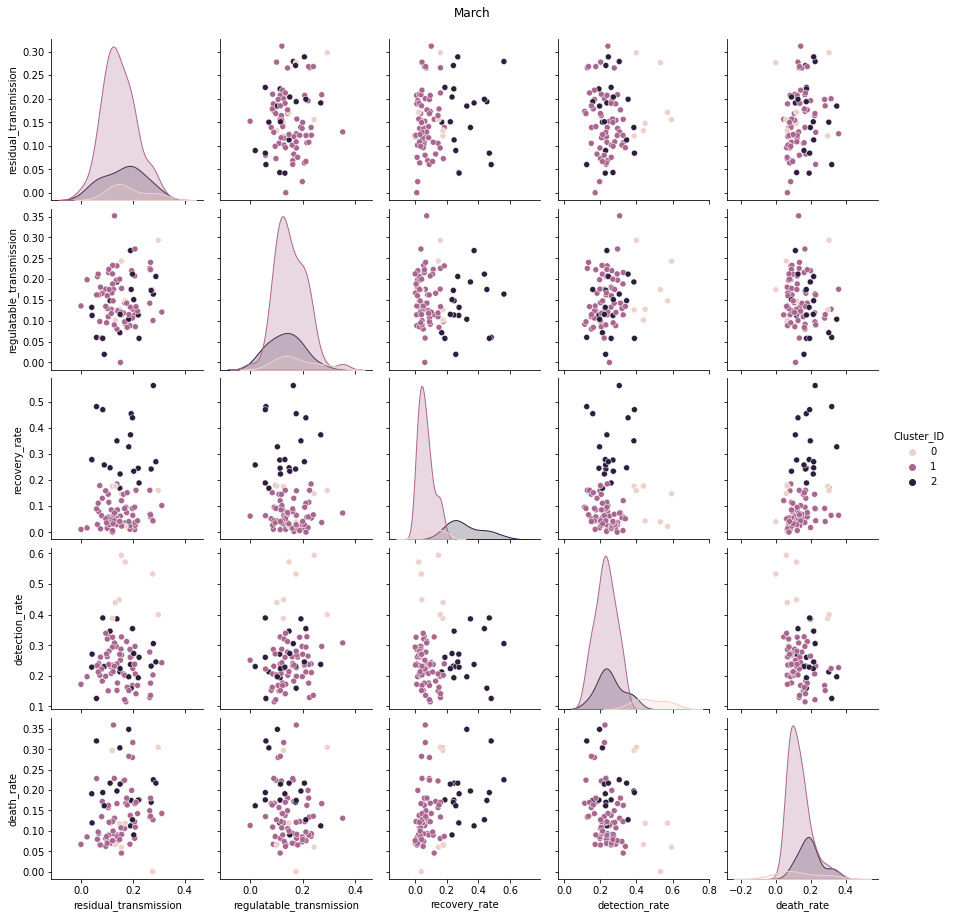

In [45]:
# pairplot the cluster distribution.
cluster_g = sns.pairplot(df_mar2, 
                         hue='Cluster_ID',diag_kind='auto',
                         x_vars=['residual_transmission', 'regulatable_transmission', 'recovery_rate', 
                    'detection_rate', 'death_rate'],
                         y_vars=['residual_transmission', 'regulatable_transmission', 'recovery_rate', 
                    'detection_rate', 'death_rate'])
plt.suptitle('March', y=1.02)
plt.savefig('March_k3_pair.png')
plt.show()

The above pairplots demonstrate the difference in response behaviour of countries in different cluster members in March 2020:
- The plot on fourth column, third row shows that countries in cluster 2 had a lower detection rate and a higher recovery rate, countries in cluster 0 had a higher detection rate and a lower recovery rate, countries in cluster 1 had a lower detection rate and a lower recovery rate.
- The plot on fourth column, fifth row shows that countries in cluster 0 had a slightly lower death rate compared with countries in cluster 1 and 2.

Distribution for cluster 0 - March


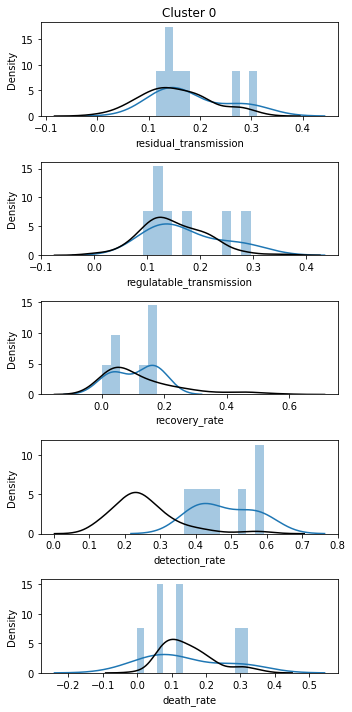

Distribution for cluster 1 - March


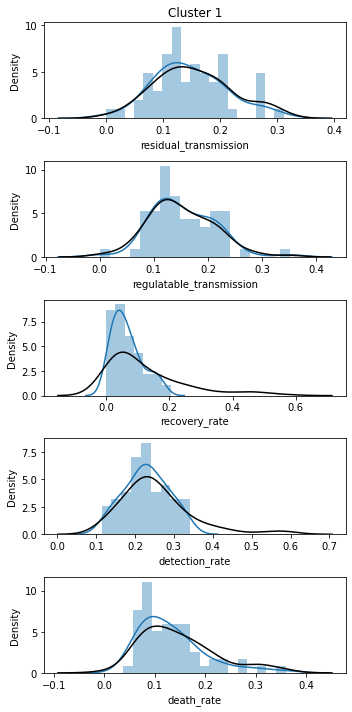

Distribution for cluster 2 - March


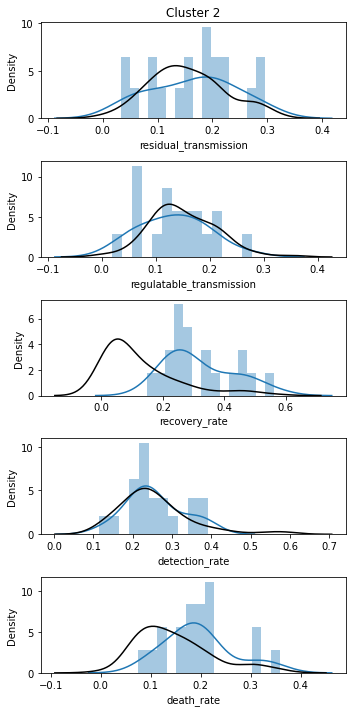

In [46]:
# Visualising variable distribution against the distributions from all data
# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['residual_transmission', 'regulatable_transmission', 'recovery_rate', 'detection_rate', 'death_rate']
n_bins = 20

# inspecting clusters
clusters_to_inspect = [0,1,2]

for cluster in clusters_to_inspect:
    # inspecting cluster 0
    print("Distribution for cluster {} - March".format(cluster))

    # create subplots
    fig, ax = plt.subplots(5, figsize=(5,10))
    plt.subplots_adjust(wspace=0.3)
    plt.subplots_adjust(hspace=0.4)
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df_mar2[col]), max(df_mar2[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df_mar2[df_mar2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df_mar2[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.savefig('March_k3_dist_cluster {}.png'.format(cluster))
    plt.show()

- Cluster 0: slightly higher transmission, recovery, and detection of patient with Covid 19. Slightly left leaning death cases. Showing that countries in cluster 0 are countries with high average transmission, higher recovery cases, higher detection of Covid 19 and lower rate of death by Covid_19.

- Cluster 1: slightly small recovery, detection, and death cases. The transmission rate is quite similar. Showing that countries in cluster 1 are countries with smaller average recovery, detection and death by Covid_19.

- Cluster 2: slightly higher transmission and higher recovery of patients. The rate of detection of covid 19 is quite similar. Right leaning death Covid 19 cases. Showing that countries in cluster 2 are countries with high average transmission, higher recovery, higher death cases, and similar detection of Covid 19 cases.

### Q3 April K=2

In [53]:
# April model K=2
model = KMeans(n_clusters=2, random_state=rs).fit(X_APR)

# assign cluster ID to each record in X
y = model.predict(X_APR)
df_apr2['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership - April")
print(df_apr2['Cluster_ID'].value_counts())

Cluster membership - April
0    79
1    27
Name: Cluster_ID, dtype: int64


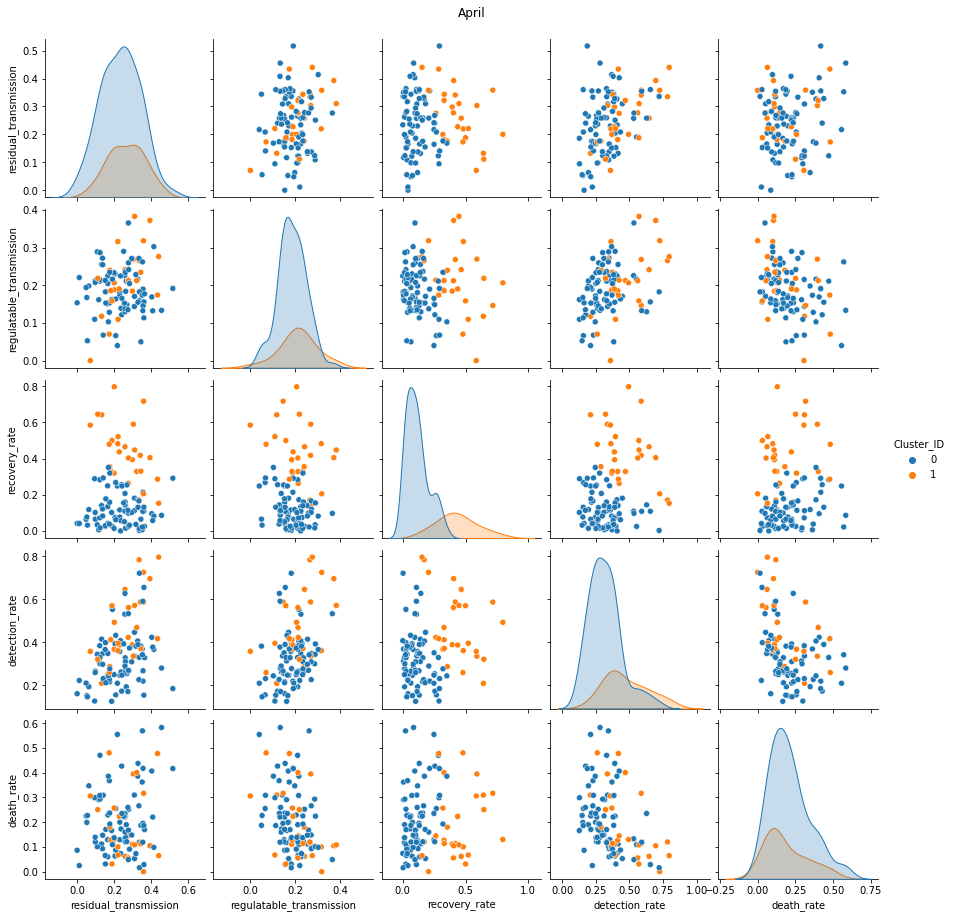

In [54]:
# pairplot the cluster distribution.
cluster_g = sns.pairplot(df_apr2, 
                         hue='Cluster_ID',diag_kind='auto',
                         x_vars=['residual_transmission', 'regulatable_transmission', 'recovery_rate', 
                    'detection_rate', 'death_rate'],
                         y_vars=['residual_transmission', 'regulatable_transmission', 'recovery_rate', 
                    'detection_rate', 'death_rate'])
plt.suptitle('April', y=1.02)
plt.savefig('April_k2_pair.png')
plt.show()


The above pairplots demonstrate the difference in response behaviour of countries in different cluster members in April 2020:
- The plot on fourth column, third row shows that countries in cluster 0 had a lower detection rate and a lower recovery rate while countries in cluster 1 had a higher detection rate and a higher recovery rate.

Distribution for cluster 0 - April


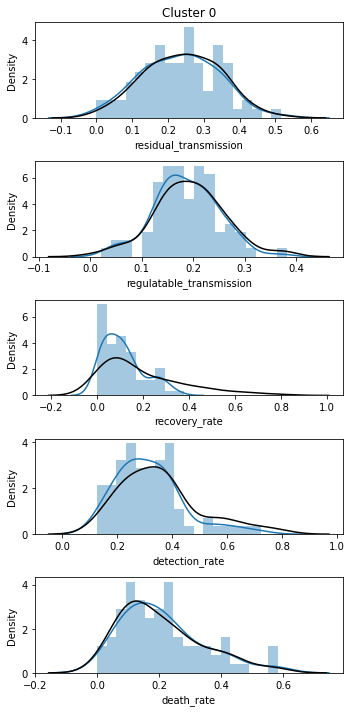

Distribution for cluster 1 - April


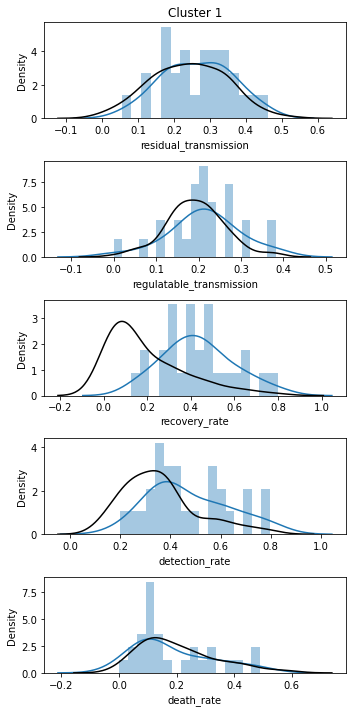

In [55]:
# Visualising variable distribution against the distributions from all data
# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = ['residual_transmission', 'regulatable_transmission', 'recovery_rate', 'detection_rate', 'death_rate']
n_bins = 20

# inspecting clusters
clusters_to_inspect = [0,1]

for cluster in clusters_to_inspect:
    # inspecting cluster 0
    print("Distribution for cluster {} - April".format(cluster))

    # create subplots
    fig, ax = plt.subplots(5, figsize=(5,10))
    plt.subplots_adjust(wspace=0.3)
    plt.subplots_adjust(hspace=0.4)
    ax[0].set_title("Cluster {}".format(cluster))

    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(df_apr2[col]), max(df_apr2[col]), 20)
        # plot distribution of the cluster using histogram
        sns.distplot(df_apr2[df_apr2['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True)
        # plot the normal distribution with a black line
        sns.distplot(df_apr2[col], bins=bins, ax=ax[j], hist=False, color="k")

    plt.tight_layout()
    plt.savefig('April_k2_dist_cluster {}.png'.format(cluster))
    plt.show()

- Cluster 0: slightly low transmission, recovery, and detection of patient with Covid 19. The death rate shows slightly higher. Showing that countries in cluster 0 are countries with small average transmission, small recovery cases, small detection of Covid 19 and higher rate of death by Covid_19.

- Cluster 1: slightly high transmission, right leaning recovery, and detection. The death rate shows slightly lower. Showing that countries in cluster 1 are countries with higher average of transmission, recovery, detection, and smaller death by Covid_19.

### Conclusion
The clusters profile looks like quite similar in both Months, but the most significance comparison is that the number of countries with above average death rate decreased from March to April.